# API功能调用

In [10]:
import pandas as pd

In [11]:
import requests
key_luo ="4996cc7eec646bf7fe2d0855069cf43f"

## 地理/逆地理编码

### 地理编码

In [12]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_luo,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [13]:
郑大 = geocode(address='河南省郑州市二七区郑州大学')
郑大

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '河南省郑州市二七区郑州大学',
   'country': '中国',
   'province': '河南省',
   'citycode': '0371',
   'city': '郑州市',
   'district': '二七区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '410103',
   'street': [],
   'number': [],
   'location': '113.636423,34.745966',
   'level': '兴趣点'}]}

In [14]:
df_郑大地理编码 = pd.json_normalize(郑大['geocodes'])
df_郑大地理编码

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,河南省郑州市二七区郑州大学,中国,河南省,0371,郑州市,二七区,[],410103,[],[],"113.636423,34.745966",兴趣点,[],[],[],[]


### 逆地理编码(基础)

In [15]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_luo,
        'location':'113.636423,34.745966',
        'poitype':141201,
        'radius':1000,
        'extensions':'base',
        'batch': True,
        'roadlevel': 0,
        'homeorcorp': 0,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [16]:
郑大逆地理编码 = regeocode(郑大)
郑大逆地理编码

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'regeocode': {'formatted_address': '河南省郑州市二七区大学路街道郑州大学出国留学培训中心郑州大学(南校区)',
  'addressComponent': {'country': '中国',
   'province': '河南省',
   'city': '郑州市',
   'citycode': '0371',
   'district': '二七区',
   'adcode': '410103',
   'township': '大学路街道',
   'towncode': '410103007000',
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': '郑州大学出国留学培训中心', 'type': '科教文化服务;培训机构;培训机构'},
   'streetNumber': {'street': '中原东路',
    'number': '49号',
    'location': '113.636252,34.7468006',
    'direction': '北',
    'distance': '94.0982'},
   'businessAreas': [{'location': '113.640765,34.754888',
     'name': '五里堡',
     'id': '410103'},
    {'location': '113.655638,34.724284', 'name': '京广路', 'id': '410103'},
    {'location': '113.614828,34.754074', 'name': '建设路', 'id': '410102'}]}}}

In [17]:
df_郑大逆地理编码 = pd.json_normalize(郑大逆地理编码).T
df_郑大逆地理编码

,0
status,1
info,OK
infocode,10000
regeocode.formatted_address,河南省郑州市二七区大学路街道郑州大学出国留学培训中心郑州大学(南校区)
regeocode.addressComponent.country,中国
regeocode.addressComponent.province,河南省
regeocode.addressComponent.city,郑州市
regeocode.addressComponent.citycode,0371
regeocode.addressComponent.district,二七区
regeocode.addressComponent.adcode,410103


### 逆地理编码(all)

In [18]:
def regeocode(location,poitype=None,radius=None,extensions="all",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_luo,
        'location':'113.636423,34.745966',
        'poitype':141201,
        'radius':1000,
        'extensions':'all',
        'batch': True,
        'roadlevel':1,
        'homeorcorp':1,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [19]:
郑大逆地理编码_all = regeocode(郑大,extensions="all")
print(郑大逆地理编码_all)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'regeocode': {'formatted_address': '河南省郑州市二七区大学路街道郑州大学出国留学培训中心郑州大学(南校区)', 'addressComponent': {'country': '中国', 'province': '河南省', 'city': '郑州市', 'citycode': '0371', 'district': '二七区', 'adcode': '410103', 'township': '大学路街道', 'towncode': '410103007000', 'neighborhood': {'name': [], 'type': []}, 'building': {'name': '郑州大学出国留学培训中心', 'type': '科教文化服务;培训机构;培训机构'}, 'streetNumber': {'street': '中原东路', 'number': '49号', 'location': '113.636252,34.7468006', 'direction': '北', 'distance': '94.0982'}, 'businessAreas': [{'location': '113.640765,34.754888', 'name': '五里堡', 'id': '410103'}, {'location': '113.655638,34.724284', 'name': '京广路', 'id': '410103'}, {'location': '113.614828,34.754074', 'name': '建设路', 'id': '410102'}]}, 'pois': [{'id': 'B01731AJON', 'name': '郑州大学南校区网络管理中心', 'type': '科教文化服务;学校;高等院校|科教文化服务;科研机构;科研机构', 'tel': '0371-67763056', 'direction': '西北', 'distance': '61.592', 'location': '113.635862,34.746273', 'address': '郑州大学逸夫楼', 'poiweig

In [20]:
df_郑大逆地理编码_all = pd.json_normalize(郑大逆地理编码_all)
display(df_郑大逆地理编码_all)

,status,info,infocode,regeocode.formatted_address,regeocode.addressComponent.country,regeocode.addressComponent.province,regeocode.addressComponent.city,regeocode.addressComponent.citycode,regeocode.addressComponent.district,regeocode.addressComponent.adcode,...,regeocode.addressComponent.streetNumber.street,regeocode.addressComponent.streetNumber.number,regeocode.addressComponent.streetNumber.location,regeocode.addressComponent.streetNumber.direction,regeocode.addressComponent.streetNumber.distance,regeocode.addressComponent.businessAreas,regeocode.pois,regeocode.roads,regeocode.roadinters,regeocode.aois
0,1,OK,10000,河南省郑州市二七区大学路街道郑州大学出国留学培训中心郑州大学(南校区),中国,河南省,郑州市,0371,二七区,410103,...,中原东路,49号,"113.636252,34.7468006",北,94.0982,"[{'location': '113.640765,34.754888', 'name': ...","[{'id': 'B01731AJON', 'name': '郑州大学南校区网络管理中心',...","[{'id': '0371I49F0160461691', 'name': '中原东路', ...","[{'direction': '东', 'distance': '338.798', 'lo...","[{'id': 'B0FFHK9L2I', 'name': '郑州大学(南校区)', 'ad..."


### 分析细节

In [21]:
roads = pd.json_normalize(郑大逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(郑大逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(郑大逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(郑大逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)

,id,name,direction,distance,location
0,0371I49F0160461691,中原东路,南,155.316,"113.637,34.7474"
1,0371I49F016046581,大学北路,西,685.71,"113.644,34.7459"
2,0371I49F016045336,嵩山南路,东,752.889,"113.628,34.7456"


,direction,distance,location,first_id,first_name,second_id,second_name
0,东,338.798,"113.6328292,34.74521639",0371I49F016046243,兴华北街,0371I49F016046611267,广场南路


,id,name,adcode,location,area,distance,type
0,B0FFHK9L2I,郑州大学(南校区),410103,"113.638852,34.742962",369882.441488,0,141201


,id,name,type,tel,direction,distance,location,address,poiweight,businessarea
0,B01731AJON,郑州大学南校区网络管理中心,科教文化服务;学校;高等院校|科教文化服务;科研机构;科研机构,0371-67763056,西北,61.592,"113.635862,34.746273",郑州大学逸夫楼,0.0914,五里堡
1,B0FFFZA3QP,郑州大学法律硕士教育中心,科教文化服务;学校;高等院校,0371-56792306,东南,18.9185,"113.636555,34.745835",大学路街道郑州大学国际学院-语文知识杂志社附近,0.169167,五里堡
2,B0FFI1ER1V,郑州大学书法学院,科教文化服务;学校;高等院校,0371-67766117,东北,6.58337,"113.636483,34.745999",大学路75号(郑州大学老校区),0.284884,五里堡
3,B0FFGH55OU,郑州大学语言文学工作委员会,科教文化服务;学校;高等院校,[],东,42.4268,"113.636878,34.745890",大学路街道郑州大学国际学院-语文知识杂志社附近,0.276304,五里堡
4,B0FFF37KG8,郑州大学信息工程学院,科教文化服务;学校;高等院校,[],南,415.785,"113.637102,34.742269",大学路75号郑州大学南校区,0.17696,五里堡
5,B01730K9IL,郑州大学-软件学院,科教文化服务;学校;高等院校,[],南,426.423,"113.637125,34.742175",大学路75号郑州大学南校区,0.540443,五里堡
6,B01730IADW,郑州大学南校区,科教文化服务;学校;高等院校,0371-67763641,东南,486.911,"113.639403,34.742336",大学北路75号,0.645774,五里堡
7,B0FFFOGIAC,郑州大学音乐学院2号琴房楼,科教文化服务;学校;高等院校,[],东南,427.19,"113.640033,34.743525",大学路75号,0.197281,五里堡
8,B01730KBZ4,郑州大学南校区音乐学院,科教文化服务;学校;高等院校,[],东南,523.992,"113.639777,34.742144",大学路75号郑州大学南校区,0.435148,五里堡
9,B0FFG23WFQ,防空兵学院,科教文化服务;学校;高等院校,[],北,565.657,"113.637288,34.751003",建设东路南50米,0.169548,五里堡


## 路径规划

### 步行路径规划

In [22]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_luo,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [23]:
四十七中 = geocode('河南省郑州市金水区第四十七中学')
四十七中_location = 四十七中['geocodes'][0]['location']
郑大_location = 郑大['geocodes'][0]['location']
print("(起点)郑大_location:",郑大_location,"(终点)四十七中_location:",四十七中_location)

(起点)郑大_location: 113.636423,34.745966 (终点)四十七中_location: 113.687847,34.806832


In [24]:
郑大_四十七中 = walking(郑大_location,四十七中_location)
df_步行路径规划 = pd.json_normalize(郑大_四十七中["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向北步行80米右转,北,[],80,64,"113.636337,34.746155;113.636337,34.746727;113....",右转,[],0
1,向东步行13米左转,东,[],13,10,"113.63635,34.746879;113.63648,34.746914",左转,[],0
2,向北步行49米右转,北,[],49,39,"113.63648,34.746914;113.636497,34.747231;113.6...",右转,[],0
3,沿中原东路向东步行801米向右前方行走,东,中原东路,801,641,"113.636497,34.747361;113.637739,34.747365;113....",向右前方行走,[],0
4,沿中原东路向东步行199米向右前方行走,东,中原东路,199,159,"113.645299,34.747483;113.645569,34.747491;113....",向右前方行走,[],0
5,沿中原东路向东步行1409米向右前方行走,东,中原东路,1409,1127,"113.647513,34.747496;113.647743,34.747418;113....",向右前方行走,[],0
6,向东步行188米向右前方行走,东,[],188,150,"113.661923,34.751354;113.66217,34.751302;113.6...",向右前方行走,[],0
7,步行409米左转,[],[],409,327,"113.663841,34.75184;113.664345,34.751862;113.6...",左转,[],5
8,沿人民路向东北步行1507米向左前方行走,东北,人民路,1507,1206,"113.667257,34.752921;113.667752,34.753138;113....",向左前方行走,[],0
9,沿人民路向东北步行259米左转,东北,人民路,259,207,"113.679661,34.76201;113.679709,34.762083;113.6...",左转,[],0


0                向北步行80米右转
1                向东步行13米左转
2                向北步行49米右转
3      沿中原东路向东步行801米向右前方行走
4      沿中原东路向东步行199米向右前方行走
5     沿中原东路向东步行1409米向右前方行走
6           向东步行188米向右前方行走
7                 步行409米左转
8     沿人民路向东北步行1507米向左前方行走
9          沿人民路向东北步行259米左转
10           沿金水路向西步行22米右转
11                 步行47米右转
12       沿金水路向东步行34米向左前方行走
13     沿花园路向北步行3774米向左前方行走
14              向北步行750米右转
15     沿广电南路向东步行343米向左前方行走
16         沿广电南路向东步行210米左转
17            向北步行66米到达目的地
Name: instruction, dtype: object

### 公交路径规划

In [25]:
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_luo,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [26]:
六十二中 = geocode('河南省郑州市第六十二中学') 
六十二中_location = 六十二中['geocodes'][0]['location'] 
二七塔 = geocode('河南省郑州市二七塔') 
二七塔_location = 二七塔['geocodes'][0]['location'] 
print("(起点)六十二中_location:",六十二中_location,"(终点)二七塔_location:",二七塔_location)

(起点)六十二中_location: 113.664188,34.710717 (终点)二七塔_location: 113.640179,34.723930


In [27]:
六十二中_二七塔 = integrated(六十二中_location,二七塔_location,city='郑州',extensions='all')
print(六十二中_二七塔)
df_bus = pd.json_normalize(六十二中_二七塔)
df_bus

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '5', 'route': {'origin': '113.664188,34.710717', 'destination': '113.640179,34.723930', 'distance': '3737', 'taxi_cost': '10.6055', 'transits': [{'cost': '1.0', 'duration': '2329', 'nightflag': '0', 'walking_distance': '1535', 'distance': '4225', 'missed': '0', 'emergency': {'linetype': '1', 'eventTagDesc': '提示', 'ldescription': '203路自3月9日起，工作日通勤高峰时段（早7:00--8:30、晚17:00--18:30）发车间隔调整为为8分钟以内，其它时段发车间隔调整为20分钟以内，首末班准点发车，恢复时间另行通知', 'ssstatus': [], 'ssdescription': [], 'esstatus': [], 'esdescription': [], 'busid': '410100013395', 'busname': '203路'}, 'segments': [{'taxi': [], 'walking': {'origin': '113.664215,34.710854', 'destination': '113.657219,34.711407', 'distance': '1002', 'duration': '858', 'steps': [{'instruction': '步行95米右转', 'road': [], 'distance': '95', 'duration': [], 'polyline': '113.664215,34.710854;113.664780,34.710842;113.664841,34.710777;113.664841,34.710716;113.664864,34.710678;113.664940,34.710655;113.665123,34.71065

,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"113.664188,34.710717","113.640179,34.723930",3737,10.6055,"[{'cost': '1.0', 'duration': '2329', 'nightfla..."


In [28]:
pd.json_normalize(六十二中_二七塔["route"]['transits'])
pd.json_normalize(六十二中_二七塔["route"]['transits'][0]['segments'])

,taxi,entrance,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,railway.via_stops,railway.alters,railway.spaces
0,[],[],[],"113.664215,34.710854","113.657219,34.711407",1002,858,"[{'instruction': '步行95米右转', 'road': [], 'dista...","[{'departure_stop': {'name': '市第六人民医院', 'id': ...",[],[],[]
1,[],[],[],"113.644180,34.725647","113.640182,34.724045",533,456,"[{'instruction': '沿大学中路步行89米右转', 'road': '大学中路...",[],[],[],[]


In [29]:
df_bus_基本信息 = pd.json_normalize(六十二中_二七塔["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,203路(汽车客运南站--建设路西三环),410100013395,普通公交线路,2690,1014,"113.657219,34.711426;113.657227,34.711502;113....",0,[],[],3,"[{'name': '汽车客运总站', 'id': '410100013395005', '...",市第六人民医院,410100013395004,"113.657219,34.711426",大学路政通路,410100013395008,"113.644188,34.725620"


In [30]:
_203路公交车 = pd.json_normalize(六十二中_二七塔["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_203路公交车"})
_203路公交车

,_203路公交车,id,location
0,汽车客运总站,410100013395005,"113.654930,34.720463"
1,老代庄,410100013395006,"113.649200,34.720482"
2,大学路航海路,410100013395007,"113.644188,34.722565"


### 驾车路径规划

In [173]:
def driving(origin,destination,sig=None)->dict:
    url = "https://restapi.amap.com/v3/direction/driving?parameters"
    params = {
        "key":key_luo,
        "origin":origin,
        "destination":destination,
        "sig":sig,
        "strategy":2,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [174]:
六十二中 = geocode('河南省郑州市第六十二中学') 
六十二中_location = 六十二中['geocodes'][0]['location'] 
二七塔_location = 二七塔['geocodes'][0]['location'] 
二七塔_六十二中 = driving(二七塔_location,六十二中_location) 
二七塔_六十二中

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.640179,34.723930',
  'destination': '113.664188,34.710717',
  'taxi_cost': '10',
  'paths': [{'distance': '3964',
    'duration': '765',
    'strategy': '距离最短',
    'tolls': '0',
    'toll_distance': '0',
    'steps': [{'instruction': '向东北行驶24米左转',
      'orientation': '东北',
      'distance': '24',
      'tolls': '0',
      'toll_distance': '0',
      'toll_road': [],
      'duration': '23',
      'polyline': '113.640175,34.724041;113.640205,34.724041;113.640297,34.724064;113.640335,34.724083;113.640358,34.724159',
      'action': '左转',
      'assistant_action': [],
      'tmcs': [{'lcode': [],
        'distance': '24',
        'status': '未知',
        'polyline': '113.640175,34.724041;113.640205,34.724041;113.640297,34.724064;113.640335,34.724083;113.640358,34.724159'}],
      'cities': [{'name': '郑州市',
        'citycode': '0371',
        'adcode': '410100',
        'districts': [{'name': '二七区

In [175]:
df_js = pd.json_normalize(二七塔_六十二中["route"]["paths"][0]['steps'])
display(df_js)
df_js["instruction"]

,instruction,orientation,distance,tolls,toll_distance,toll_road,duration,polyline,action,assistant_action,tmcs,cities,road
0,向东北行驶24米左转,东北,24,0,0,[],23,"113.640175,34.724041;113.640205,34.724041;113....",左转,[],"[{'lcode': [], 'distance': '24', 'status': '未知...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",NaN
1,向北行驶73米右转,北,73,0,0,[],32,"113.640358,34.724159;113.640373,34.724674;113....",右转,[],"[{'lcode': [], 'distance': '57', 'status': '未知...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",NaN
2,沿政通路向东行驶316米右转进入主路,东,316,0,0,[],95,"113.640373,34.724827;113.640976,34.724827;113....",右转,进入主路,"[{'lcode': [], 'distance': '55', 'status': '畅通...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",政通路
3,沿大学中路向南行驶469米左转,南,469,0,0,[],108,"113.643959,34.724831;113.643967,34.723881;113....",左转,[],"[{'lcode': [], 'distance': '105', 'status': '畅...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",大学中路
4,沿航海中路向东行驶1.9千米右转,东,1917,0,0,[],270,"113.644073,34.72039;113.644836,34.720417;113.6...",右转,[],"[{'lcode': [], 'distance': '254', 'status': '畅...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",航海中路
5,沿碧云路向南行驶1.1千米右转,南,1069,0,0,[],203,"113.665092,34.720325;113.665092,34.719654;113....",右转,[],"[{'lcode': [], 'distance': '74', 'status': '畅通...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",碧云路
6,向西行驶96米到达目的地,西,96,0,0,[],34,"113.665123,34.710648;113.66494,34.710651;113.6...",[],到达目的地,"[{'lcode': [], 'distance': '16', 'status': '未知...","[{'name': '郑州市', 'citycode': '0371', 'adcode':...",NaN


0            向东北行驶24米左转
1             向北行驶73米右转
2    沿政通路向东行驶316米右转进入主路
3       沿大学中路向南行驶469米左转
4      沿航海中路向东行驶1.9千米右转
5       沿碧云路向南行驶1.1千米右转
6          向西行驶96米到达目的地
Name: instruction, dtype: object

## 行政区域查询

In [169]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_luo,
        'keywords':'410100',
        'subdistrict':2,
        'page':1,
        'offset':20,
        'extensions':'all',
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [170]:
行政区域 = district(keywords='河南',extensions='all',subdistrict=2)

In [171]:
df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
df_行政区域_1级

,citycode,adcode,name,center,level,districts
0,0371,410185,登封市,"113.037768,34.459939",district,"[{'citycode': '0371', 'adcode': '410185', 'nam..."
1,0371,410108,惠济区,"113.61836,34.828591",district,"[{'citycode': '0371', 'adcode': '410108', 'nam..."
2,0371,410105,金水区,"113.686037,34.775838",district,"[{'citycode': '0371', 'adcode': '410105', 'nam..."
3,0371,410102,中原区,"113.611576,34.748286",district,"[{'citycode': '0371', 'adcode': '410102', 'nam..."
4,0371,410183,新密市,"113.380616,34.537846",district,"[{'citycode': '0371', 'adcode': '410183', 'nam..."
5,0371,410184,新郑市,"113.73967,34.394219",district,"[{'citycode': '0371', 'adcode': '410184', 'nam..."
6,0371,410122,中牟县,"114.022521,34.721976",district,"[{'citycode': '0371', 'adcode': '410122', 'nam..."
7,0371,410106,上街区,"113.298282,34.808689",district,"[{'citycode': '0371', 'adcode': '410106', 'nam..."
8,0371,410182,荥阳市,"113.391523,34.789077",district,"[{'citycode': '0371', 'adcode': '410182', 'nam..."
9,0371,410181,巩义市,"112.98283,34.75218",district,"[{'citycode': '0371', 'adcode': '410181', 'nam..."


## 搜索POI

### 关键字搜索

In [35]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_luo,
        'keywords':'郑州西亚斯学院',
        'types':'科教文化服务',
        'city':'郑州',
        'citylimit':True,
        'children':1,
        'page':page,
        'extensions':'all',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [36]:
西亚斯 = place_text('大学','高等院校',city="郑州市",children=1,extensions='all')
西亚斯

{'status': '1',
 'count': '69',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B01730JLX0',
   'parent': [],
   'childtype': [],
   'name': '郑州西亚斯学院',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '人民路168号',
   'location': '113.765389,34.401713',
   'tel': '0371-62600888;0371-62601234',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '410000',
   'pname': '河南省',
   'citycode': '0371',
   'cityname': '郑州市',
   'adcode': '410184',
   'adname': '新郑市',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '5113468100',
   'distance': [],
   'navi_poiid': 'I49F020047_18178;332;979',
   'entr_location': '113.76805,34.395796',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '3',
   'timestamp': '2020-04-20 17:33:27',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [],

In [37]:
df_西亚斯 = pd.json_normalize(西亚斯["pois"])
df_西亚斯_郑州西亚斯学院 = pd.json_normalize(西亚斯["pois"][7]["children"])
display(df_西亚斯,df_西亚斯_郑州西亚斯学院)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B01730JLX0,[],[],郑州西亚斯学院,[],科教文化服务;学校;高等院校,141201,[],人民路168号,"113.765389,34.401713",...,0,[],"[{'id': ' B01730JQAG ', 'name': ' 郑州西亚斯学院(南门) ...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
1,B0FFK5A79O,B01730JLX0,309,郑州西亚斯学院护理学院,[],科教文化服务;学校;高等院校,141201,[],人民路168号,"113.766756,34.402957",...,0,[],[],[],[],[],[],[],[],[]
2,B0FFK5A6CE,B01730JLX0,309,郑州西亚斯学院-音乐学院,[],科教文化服务;学校;高等院校,141201,[],新烟街道人民路东段168号,"113.761060,34.397803",...,0,[],"[{'id': ' B0FFGK5HLA ', 'name': ' 郑州西亚斯学院音乐学院(...",[],[],[],[],[],[],[]
3,B0FFK5A79N,B01730JLX0,309,郑州西亚斯学院国际教育学院,[],科教文化服务;学校;高等院校,141201,[],人民路168号,"113.766752,34.402952",...,0,[],"[{'id': ' B0FFGK5NOT ', 'name': ' 郑州西亚斯学院国际教育学...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B0FFK7MR4Q,B01730JLX0,309,郑州西亚斯学院商学院,[],科教文化服务;科教文化场所;科教文化场所,140000,[],人民路168号,"113.768026,34.396525",...,0,[],[],[],[],[],[],[],[],[]
5,B0FFLPAZGW,B017316OF7,309,郑州大学西亚斯国际学院法学院,[],科教文化服务;科教文化场所;科教文化场所,140000,[],郑州大学西亚斯国际学院10号楼,"113.763570,34.397804",...,0,[],[],[],[],[],[],[],[],[]
6,B0FFIBCHP3,B01730JLX0,309,郑州西亚斯学院-学务处,[],科教文化服务;科教文化场所;科教文化场所,140000,[],人民东路168号郑州西亚斯学院,"113.764368,34.395700",...,0,[],[],[],[],[],[],[],[],[]
7,B0FFIK3IT6,B01730JLX0,309,郑州西亚斯学院法学院,[],科教文化服务;科教文化场所;科教文化场所,140000,[],郑州西亚斯学院10号楼,"113.763578,34.397809",...,0,[],[],[],[],[],[],[],[],[]
8,B0FFK5A79M,B01730JLX0,309,郑州西亚斯学院体育学院,[],科教文化服务;学校;高等院校,141201,[],西亚斯欧洲街,"113.768089,34.402938",...,0,[],"[{'id': ' B0FFGK5NCH ', 'name': ' 郑州西亚斯学院体育学院(...",[],[],[],[],[],[],[]
9,B0FFHK4X0Z,B01730JLX0,309,郑州西亚斯学院-图书馆,[],科教文化服务;图书馆;图书馆,140500,[],人民路168号,"113.764574,34.401567",...,0,[],[],"[{'title': [], 'url': 'http://aos-cdn-image.am...",[],[],[],[],[],[]


""


### 周边搜索

In [38]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_luo,
        'keywords':'博物馆',
        'location':'113.765389,34.401713',
        'types':'140100',
        'city':'郑州市',
        'redius':1000,
        'sortrule':'distance',
        'offset':offset,
        'page':1,
        'extensions':'base',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [39]:
郑大_周边POI = place_around(郑大_location)
郑大_周边POI

{'status': '1',
 'count': '65',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B017304578',
   'parent': [],
   'childtype': [],
   'name': '新郑博物馆',
   'type': '科教文化服务;博物馆;博物馆|风景名胜;风景名胜相关;旅游景点',
   'typecode': '140100|110000',
   'biz_type': [],
   'address': '轩辕路228号(近黄帝故里)',
   'location': '113.722651,34.399811',
   'tel': '0371-62698808;12301',
   'distance': '3931',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFKVSVMD',
   'parent': [],
   'childtype': [],
   'name': '庹福-朝泓膏药博物馆',
   'type': '科教文化服务;博物馆;博物馆',
   'typecode': '140100',
   'biz_type': [],
   'address': '107国道和双拥路交叉口尚居倍利产业园',
   'location': '113.686807,34.542329',
   'tel': [],
   'distance': '17234',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '1',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFMCJBG5',
   'parent': [],
   'childtype': [],
   'name': '

In [40]:
df_郑大_周边POI = pd.json_normalize(郑大_周边POI['pois'])
df_郑大_周边POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B017304578,[],[],新郑博物馆,科教文化服务;博物馆;博物馆|风景名胜;风景名胜相关;旅游景点,140100|110000,[],轩辕路228号(近黄帝故里),"113.722651,34.399811",0371-62698808;12301,3931,[],[],[],2,[],[]
1,B0FFKVSVMD,[],[],庹福-朝泓膏药博物馆,科教文化服务;博物馆;博物馆,140100,[],107国道和双拥路交叉口尚居倍利产业园,"113.686807,34.542329",[],17234,[],[],[],1,[],[]
2,B0FFMCJBG5,[],[],郑州失恋博物馆(锦荣悦汇城店),科教文化服务;博物馆;博物馆,140100,[],[],"113.861737,34.564936",17324992333,20206,[],[],[],0,[],[]
3,B0FFHP8YXC,[],[],河南省鬼斧神工雕塑艺术文化发展有限公司,科教文化服务;博物馆;博物馆|公司企业;公司;公司,140100|170200,[],曲梁产业聚集区岗牛村,"113.623760,34.543550",13903815565,20450,[],[],[],1,[],[]
4,B01730I1Z9,B017304769,302,恒昌始祖山蜜蜂博物馆,科教文化服务;博物馆;博物馆,140100,[],始祖山,"113.547509,34.347022",[],20924,[],[],[],0,[],[]
5,B0173168A2,[],[],河南机床博物馆,科教文化服务;博物馆;博物馆,140100,[],龙湖镇商业路东段,"113.717401,34.592049",[],21640,[],[],[],0,[],[]
6,B0FFKWVPE1,[],[],新郑星空失恋博物馆,科教文化服务;博物馆;博物馆,140100,[],龙湖镇高坡岩新农村第二排第二道街梦幻主题酒店对面中豪宾馆二楼星空失恋博物馆,"113.712309,34.611566",18911189812,23862,[],[],[],1,[],[]
7,B0FFMAOTU8,[],[],郑州失恋博物馆(华祥国贸店),科教文化服务;博物馆;博物馆,140100,[],[],"113.681453,34.610943",[],24531,[],[],[],0,[],[]
8,B0FFMBRYNF,[],[],郑州鸟虫篆艺术博物馆,科教文化服务;博物馆;博物馆,140100,[],文德路鼎盛街交叉口,"113.732233,34.684730",[],31651,[],[],[],1,[],[]
9,B0FFFW4263,B01730ISNA,309,黄河科技学院南校区中国民办教育博物馆,科教文化服务;博物馆;博物馆,140100,[],紫荆山南路666号(黄河科技学院南校区内),"113.676355,34.687073",0371-68784636,32798,[],[],[],0,[],[]


### 多边形搜索

In [41]:
def place_polygon(keywords,types=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/polygon?parameters '
    params={
        'key':key_luo,
        'polygon':'113.655638,34.724284|113.614828,34.754074',
        'keywords':'学校',
        'types':141200,
        'offset':offset,
        'page':1,
        'extensions':'base',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [42]:
郑大_多边 = place_polygon("小学")
郑大_多边

{'status': '1',
 'count': '90',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFF4HJ86',
   'parent': [],
   'childtype': [],
   'name': '郑州市桃园中学',
   'type': '科教文化服务;学校;中学',
   'typecode': '141202',
   'biz_type': [],
   'address': '桃源路42号',
   'location': '113.637167,34.739529',
   'tel': '0371-67763161',
   'distance': [],
   'biz_ext': [],
   'pname': '河南省',
   'cityname': '郑州市',
   'adname': '二七区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B017304732',
   'parent': [],
   'childtype': [],
   'name': '郑州第二中学',
   'type': '科教文化服务;学校;中学',
   'typecode': '141202',
   'biz_type': [],
   'address': '大学路街道桃源路43号',
   'location': '113.638729,34.739403',
   'tel': '0371-67940256',
   'distance': [],
   'biz_ext': [],
   'pname': '河南省',
   'cityname': '郑州市',
   'adname': '二七区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []}

## IP定位

In [43]:
def parameters(sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key_luo,
        'ip':'120.24.42.221',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [44]:
ip = parameters('120.24.42.221')
ip

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '深圳市',
 'adcode': '440300',
 'rectangle': '113.9629412,22.4627142;114.2106056,22.61394155'}

In [45]:
df_ip = pd.json_normalize(ip)
df_ip

,status,info,infocode,province,city,adcode,rectangle
0,1,OK,10000,广东省,深圳市,440300,"113.9629412,22.4627142;114.2106056,22.61394155"


## 批量请求接口

In [163]:
def body(url)->dict:
    url = "https://restapi.amap.com/v3/batch?key=" + key_luo
    header = {
        'Content-Type':'application/json',
    }

    params={
        "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=4996cc7eec646bf7fe2d0855069cf43f&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=4996cc7eec646bf7fe2d0855069cf43f&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]    # 官网提供
    }
    response = requests.post(url,json=params)
    data = response.json()
    return data

In [164]:
pl = body('url')
pl

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

## 静态地图

In [50]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_luo,
        'location':'113.636423,34.745966',
        'zoom':16,
        'size':size,
        'scale':1,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':0,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

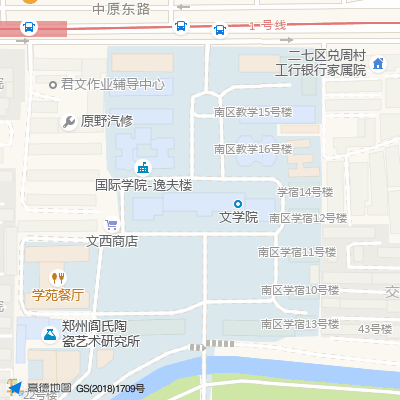

In [51]:
staticmap(location='113.636423,34.745966',zoom=16)

## 坐标转换

In [70]:
def coordsys(locations,coordsys='gps',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key_luo,
        'locations':'113.636423,34.745966',
        'coordsys':'gps',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [71]:
gps = coordsys('113.636423,34.745966')
gps

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '113.630012962903,34.73967056173'}

In [72]:
df_gps = pd.json_normalize(gps)
df_gps

,status,info,infocode,locations
0,1,ok,10000,"113.630012962903,34.73967056173"


## 天气查询

### 实况天气

In [74]:
def lives(city,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key_luo,
        'city':'410100',
        'extensions':'base',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [75]:
weather = lives('410100')
weather

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '河南',
   'city': '郑州市',
   'adcode': '410100',
   'weather': '多云',
   'temperature': '16',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '21',
   'reporttime': '2020-04-22 17:22:28'}]}

In [77]:
df_weather = pd.json_normalize(weather)
df_weather

,status,count,info,infocode,lives
0,1,1,OK,10000,"[{'province': '河南', 'city': '郑州市', 'adcode': '..."


### 预报天气

In [78]:
def forest(city,extensions='all',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key_luo,
        'city':'410100',
        'extensions':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [79]:
weather = forest('410100')
weather

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'forecasts': [{'city': '郑州市',
   'adcode': '410100',
   'province': '河南',
   'reporttime': '2020-04-22 18:22:27',
   'casts': [{'date': '2020-04-22',
     'week': '3',
     'dayweather': '多云',
     'nightweather': '多云',
     'daytemp': '17',
     'nighttemp': '7',
     'daywind': '东北',
     'nightwind': '东北',
     'daypower': '4',
     'nightpower': '4'},
    {'date': '2020-04-23',
     'week': '4',
     'dayweather': '多云',
     'nightweather': '晴',
     'daytemp': '20',
     'nighttemp': '7',
     'daywind': '东北',
     'nightwind': '东北',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-24',
     'week': '5',
     'dayweather': '晴',
     'nightweather': '晴',
     'daytemp': '24',
     'nighttemp': '13',
     'daywind': '西',
     'nightwind': '西',
     'daypower': '5',
     'nightpower': '5'},
    {'date': '2020-04-25',
     'week': '6',
     'dayweather': '多云',
     'nightweather': '多云',
     'da

## 输入提示

In [81]:
def tips(city=None,location=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key_luo,
        'keywords':'郑大',
        'types':'141201',
        'city':'410100',
        'location': '113.636423,34.745966',
        'citylimit':True,
        'datatype':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [82]:
tip = tips('郑大')
tip

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B0173080HG',
   'name': '郑州大学第一附属医院河医院区',
   'district': '河南省郑州市二七区',
   'adcode': '410103',
   'location': '113.64609,34.752743',
   'address': '建设东路1号',
   'typecode': '090101',
   'city': []},
  {'id': 'B0FFF90QNJ',
   'name': '郑州大学第一附属医院郑东院区',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.762218,34.797224',
   'address': '龙湖中环路1号',
   'typecode': '090101',
   'city': []},
  {'id': 'B0173046B7',
   'name': '郑州大学第二附属医院',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.670326,34.766054',
   'address': '经八路2号',
   'typecode': '090101',
   'city': []},
  {'id': 'B01730K37H',
   'name': '郑大',
   'district': '河南省郑州市中原区',
   'adcode': '410102',
   'location': '113.53591,34.817077',
   'address': '科学大道100号',
   'typecode': '141201',
   'city': []},
  {'id': 'BV10090778',
   'name': '郑大新区南门(公交站)',
   'district': '河南省郑州市中原区',
   'adcode': '410102',
   'locatio

In [83]:
df_tp = pd.json_normalize(tip,record_path='tips')
df_tp

,id,name,district,adcode,location,address,typecode,city
0,B0173080HG,郑州大学第一附属医院河医院区,河南省郑州市二七区,410103,"113.64609,34.752743",建设东路1号,090101,[]
1,B0FFF90QNJ,郑州大学第一附属医院郑东院区,河南省郑州市金水区,410105,"113.762218,34.797224",龙湖中环路1号,090101,[]
2,B0173046B7,郑州大学第二附属医院,河南省郑州市金水区,410105,"113.670326,34.766054",经八路2号,090101,[]
3,B01730K37H,郑大,河南省郑州市中原区,410102,"113.53591,34.817077",科学大道100号,141201,[]
4,BV10090778,郑大新区南门(公交站),河南省郑州市中原区,410102,"113.537651,34.807796",(停运)259路;(停运)725路;182路;408路;B12路;B67路;Y18路,150700,[]
5,B0173042A5,郑州大学第三附属医院(省妇幼保健院),河南省郑州市二七区,410103,"113.647987,34.743302",康复前街7号,090200,[]
6,B017307AN8,郑大五附院,河南省郑州市二七区,410103,"113.651616,34.743497",康复前街3号,090101,[]
7,B01730IADW,郑州大学南校区,河南省郑州市二七区,410103,"113.639403,34.742336",大学北路75号,141201,[]
8,B017319YQ8,郑州大学第一附属医院河医院区门诊部,河南省郑州市二七区,410103,"113.644960,34.753330",建设东路1号郑州大学第一附属医院内,090101,[]
9,B0FFF90LYD,郑州大学新校区(北门),河南省郑州市中原区,410102,"113.536283,34.826855",莲花街,991400,[]


## 交通态势

### 矩形区域交通态势

In [92]:
def trafficinfo(rectangle,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key_luo,
        'rectangle':'116.351147,39.966309;116.357134,39.968727',
        'level':4,
        'extensions':'all',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [93]:
traffic = trafficinfo('116.351147,39.966309;116.357134,39.968727')
traffic

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北四环路：北辰西桥附近自西向东行驶缓慢。',
  'evaluation': {'expedite': '81.25%',
   'congested': '18.75%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'},
  'roads': [{'name': '北四环路',
    'status': '2',
    'direction': '从北辰西桥到北辰桥',
    'angle': '2',
    'speed': '20',
    'lcodes': '4708',
    'polyline': '116.38929,39.9878502;116.397903,39.988102'},
   {'name': '北四环路',
    'status': '2',
    'direction': '从安慧桥到北辰东路',
    'angle': '182',
    'speed': '30',
    'lcodes': '-5934',
    'polyline': '116.404282,39.9884605;116.402878,39.9884186;116.397621,39.9882698'},
   {'name': '北三环路',
    'status': '1',
    'direction': '从大钟寺到马甸桥',
    'angle': '1',
    'speed': '50',
    'lcodes': '5878,4731,5897,4730,6489,4729',
    'polyline': '116.343964,39.9675789;116.345161,39.9675903;116.34626,39.9676018;116.347557,39.9676018;116.348083,39.967617;116.348465,39.9676208;116.349258,39.967636

In [94]:
df_tra = pd.json_normalize(traffic,meta='roads')
df_tra

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description,trafficinfo.roads
0,1,OK,10000,北四环路：北辰西桥附近自西向东行驶缓慢。,81.25%,18.75%,0.00%,0.00%,2,轻度拥堵,"[{'name': '北四环路', 'status': '2', 'direction': ..."


### 圆形区域交通态势

In [105]:
def trafficinfo(circle,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/circle?parameters'
    params={
        'key':key_luo,
        'location':'116.3057764,39.98641364',
        'level':4,
        'radius':1000,
        'extensions':'base',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [106]:
traffic_circle = trafficinfo('116.3057764,39.98641364')
traffic_circle

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北四环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

In [107]:
df_tra_cir = pd.json_normalize(traffic_circle)
df_tra_cir

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description
0,1,OK,10000,北四环路：双向畅通。,100.00%,0.00%,0.00%,0.00%,1,整体畅通


### 指定线路交通态势

In [108]:
def trafficinfo(road,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/road?parameters'
    params={
        'key':key_luo,
        'location':'116.3057764,39.98641364',
        'name':'北环大道',
        'adcode':'440300',
        'level':4,
        'extensions':'base',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [109]:
traffic_road = trafficinfo('116.3057764,39.98641364')
traffic_road

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北环大道：双向缓慢，从北环沙河西立交到北环香蜜立交严重拥堵，从北环龙珠立交到北环沙河东立交严重拥堵。',
  'evaluation': {'expedite': '43.04%',
   'congested': '31.97%',
   'blocked': '24.99%',
   'unknown': '0.00%',
   'status': '3',
   'description': '行驶缓慢'}}}

In [110]:
df_tra_road = pd.json_normalize(traffic_road)
df_tra_road

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description
0,1,OK,10000,北环大道：双向缓慢，从北环沙河西立交到北环香蜜立交严重拥堵，从北环龙珠立交到北环沙河东立交严...,43.04%,31.97%,24.99%,0.00%,3,行驶缓慢


## 地理围栏

### 新建围栏

In [155]:
def creat(key)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key='+key_luo
    params={
        "name": "一个围栏", 
        "center": '113.260032,23.124473',
        "radius": "1000",
        "enable": "true",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "一个围栏描述",
        "alert_condition": "enter;leave",
        "valid_time": "2020-11-28",
    }
    response = requests.post(url,json=params)
    data = response.json()
    return data
creat(key_luo)

{'data': {'gid': '0900a485-15c7-4912-8195-db54afc7ee56',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 查询围栏

In [157]:
def find(gid,name=None,page_no=None,page_size=None,enable=None,)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key='+key_luo
    parmas={
        'key':key_luo,
        'id':'0',
        'gid':'a8b3c1dd-c6aa-4c69-9974-b473d5dda8a5',
        'name':'w_01',
        'page_no':None,
        'page_size':None,
        'enable':None,
        'start_time':'2018-07-03 10:04:16',
        'end_time':'2020-08-18 06:04:08'     
    }
    response = requests.get(url,params=parameters)
    data = response.json()
    return data
rs = find(gid)
rs

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '113.260032,23.124473',
    'create_time': '2020-04-22 21:30:14',
    'enable': True,
    'fixed_date': '',
    'gid': '0900a485-15c7-4912-8195-db54afc7ee56',
    'id': '0',
    'key': '4996cc7eec646bf7fe2d0855069cf43f',
    'name': '一个围栏',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-11-28'}],
  'total_record': 1},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [158]:
df_rs = pd.json_normalize(rs['data'])
df_rs

,page_no,page_size,rs_list,total_record
0,1,20,"[{'adcode': '0', 'alert_condition': 'enter;lea...",1


## 轨迹纠偏

In [159]:
import json
def grasproad(Key)->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving?key='+key_luo
    body = [{
        "x": 116.449429,
        "y": 40.014844,
        "sp": 4,
        "ag": 110,
        "tm": 1478831753
    }, {
        "x": 116.449639,
        "y": 40.014776,
        "sp": 3,
        "ag": 110,
        "tm": 23
    },{
        "x": 116.449859,
        "y": 40.014716,
        "sp": 3,
        "ag": 111,
        "tm": 33
        
    }, {
        "x": 116.450074,
        "y": 40.014658,
        "sp": 3,
        "ag": 110,
        "tm": 31
    }, {
        "x": 116.450273,
        "y": 40.014598,
        "sp": 3,
        "ag": 111,
        "tm": 20
    }]
    response = requests.post(url,data=json.dumps(body))
    data = response.json()
    return data

In [160]:
gj = grasproad('Key')
gj

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# ML/AI思考

## 地理/逆地理编码
- 需要计算机保存处理相关数据
- 使用ML数据库，便于下面代码调用
## 路径规划
- 推荐算法，路径规划在分析出原有数据的基础上，给出更优路线
- 机器学习，分析出更优路径返回
## 行政区域查询
- 计算机算法帮助确定行政区域
- 数据库存储行政区域信息
## 搜索POI
- 检索算法，把位置周边的数据提取出来
- 计算机帮助定位，处理相关数据
## IP定位
- 基站检索
- 计算机处理post的位置信息
## 批量请求接口
- 调用接口处理批量请求并返回
## 静态地图
- 计算机视觉，得到用户请求的区域地图
- 检索算法，搜索到用户请求的区域信息
## 坐标转换
- 数值分析算法，得到用户请求的位置信息后进行转换
## 天气查询
- 搜索算法，根据用户给的信息返回其所在地区天气情况
- 预测算法，根据近几日的天气分析推测出未来的天气情况
- 数据仓库提取数据并给出返回
## 输入提示
- 推荐算法，根据用户给出的关键词进行预测推算
- 检索算法，在用户检索的时候给出相关推测
## 交通态势
- 定位，通过用户给的信息得到精确位置信息
- 检测车辆密度并进行分析判断
- 计算机视觉，对用户所在区域的车流信息进行返回
## 地理围栏
- 计算机视觉，对用户给的地区进行规划处理
## 轨迹纠偏
- 计算机视觉，对用户给的方向信息与规划信息进行比较并返回
- 预测，根据用户当前行驶路径并对接下来的行动作出预测

# 设计应用 

## 应用概述
*日常记录app*
- 可以对用户拍摄的照片、到达的地点等重要的信息进行存储分析；
- 在进行记录的时候可以对人物及地点进行分类记录，便于今后查看人物及地点信息；
- 通过对用户记录的数据进行分析，得出用户的导致喜好--“常在一起的好朋友”，“喜欢逛的店”，“常光顾的餐厅”
- 对用户未来的出行进行规划--推荐出行的地点或是符合心情及场合的穿搭。

##  API功能
- 人脸检测：识别用户照片中的人脸，进行分析处理，分类放置在合适的标签中，可以得到心情、亲密度等反馈。
- 计算机影像：识别用户在app中记录的地点等信息，并返回详尽的内容及预测。
- 高德地图api-路径规划：对用户喜爱的店铺、餐馆等位置进行记录分析，在下次出行前进行合适的路线规划。
- 高德地图api-天气查询：根据用户地点返回实时天气情况，并推荐合适穿搭；返回未来几日天气判断分析用户出行计划的可实施性。
- 高德地图api-搜索poi：对用户所在地区进行分析，返回在当前位置符合用户需求的周边设施。
